<a href="https://colab.research.google.com/github/git-hys/Python25Study/blob/main/04_02_%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 영업팀은 매주 7개의 생선 중에서 일부를 무작위로 골라 머신러닝 모델을 학습 할 수 있게 훈련데이터를 제공하고 있다
# 하지만 수산물을 제공한다는 곳이 많아서 샘플을 골라내는 일이 너무 힘들다, 추가되는 수산물의 샘플이 없다

# 영업팀은 새로운 생선이 도착하는 대로 가능한 즉시 훈련 데이터를 제공해야한다

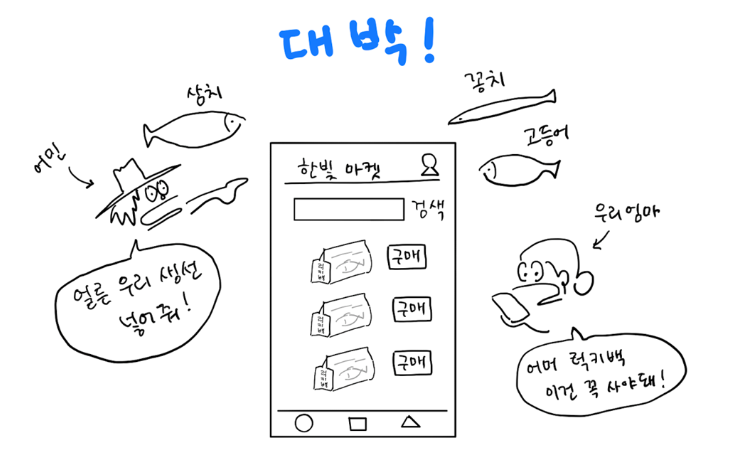

In [2]:
# 점진적 학습

# 문제점 : 훈련데이터가 한번에 준비되는 것이 아니라 조금씩 전달됨

# 해결법
# 1. 기존의 훈련데이터에 새로운 데이터를 추가하여 모델을 매일 다시 훈련
# -> 단점 : 시간이 지날 수록 데이터가 늘어남
#       -> 인력추가, 서버증설, 시간적 여유가 없음 / 지속 가능 여부 확인

# 2. 새로운 데이터를 추가할 때 마다 이전 데이터를 버림, 훈련데이터 크기를 일정하게 유지
# -> 단점 : 데이터를 버릴때 다른 데이터에 없는 중요한 생선 데이터가 지워질 수 있음

# 3. 점진적 학습 방법 / 온라인 학습, 훈련한 모델을 버리지 않고 조금씩 새로운 데이터를 학습
# -> 확률적 경사 하강법

In [ ]:
#  확률적 경사 하강법(실제 산에서 내려오는 것 처럼 가파른 길을 찾아 천천히 조금씩 내려옴)
# 확률적 : 무작위, 랜덤(훈련세트에서 랜덤하게 하나의 샘플을 고름)
# 경사 : 기울기
# 하강 : 내려감
# 확률적 경사 하강법은 훈련세트에서 랜덤하게 하나의 샘플을 선택해서 가파른 경사를 조금 내려감
# 위 방법을 반복 수행
# 만약 모든 샘플을 다 사용해도 다 내려오지 못하는 경우
# 처음 부터 다시 시작
# 훈련세트에 모든 샘플을 다시 채워 넣음
# 다시 랜덤하게 하나의 샘플을 선택하여 이어서 경사를 내려감
# 만족할만한 위치에 도달 할 때 까지 계속 내려감
# 훈련세트를 한번 모두 사용한는 과정을 에포크(epoch)라고함
# 일반적인 경사하강법은 수십, 수백번 이상의 에포크를 수행함
# 만약, 실제로 등산이라고 가정하고 산에서 내려온다고 생각했을 때 집으로 돌아가려면
# 등산로의 입구까지 내려가야 한다.
# 만약 어떤 산길로 척척 내려갈 수 있는 초능력이 있다며 가장 빠른 길을 선택하는 것이 최선
# 가장 빠른 길을 경사가 가장 가파른길

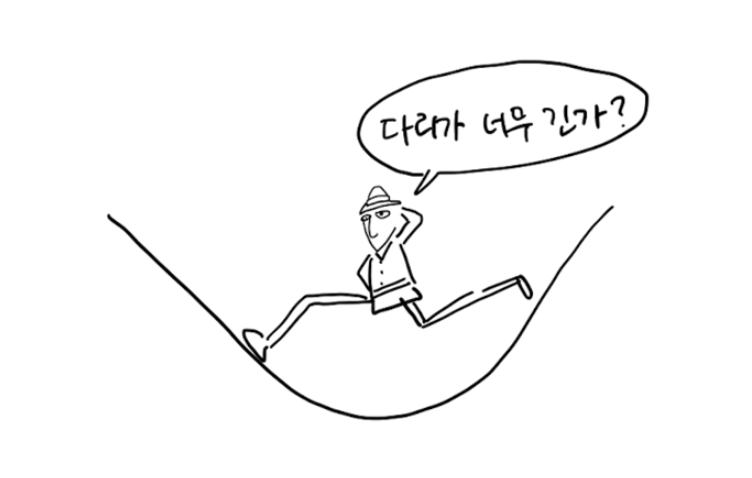

In [ ]:
# 실제로 산에서 내려올 때는 천천히 조금씩 내려와야 한다 - > 경사하강법
# 가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 것이 중요 - > 훈련법
# 훈련세트를 사용해 모델을 훈련하기 때문에 경사 하강법도 당연히 가장 가파른 길을 찾음
# 그런테 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련세트에서 랜덤하게 골라 가장 가파른 길을 찾음 ->  확률
# 결론  : 훈련세트에서 랜덤하게 하나의 샘플을 선택해서 가파른 경사를 조금씩 내려간 다음 훈련세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려감 -> 전체 샘플 모두 사용할 때 까지 진행

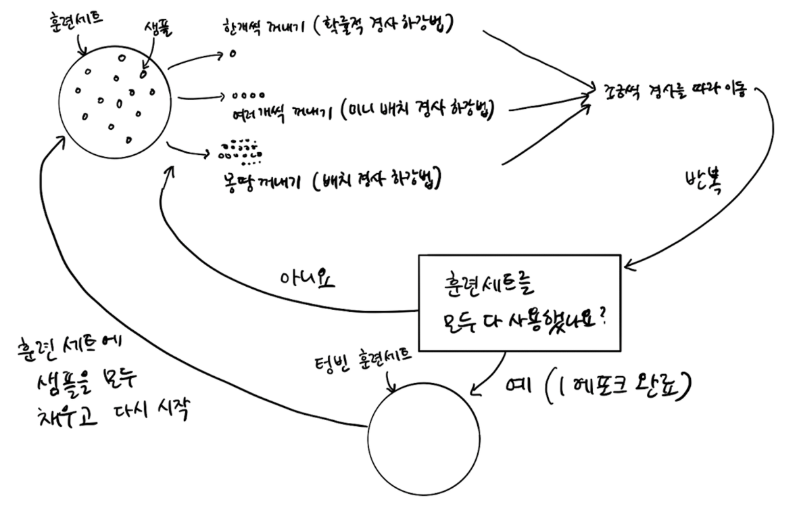

In [ ]:
# 위 방법대로 샘플을 1개를 이용하면 너무 무책임하게 내려갈 수 있다.
# 잘못된 훈련으로 결과가 나오면 돌아갈 수 없다
# 이런한 문제점을 해소하려고 무작위로 몇개으리 샘플을 선택하여 경사를 내려간다면

# 미니배치경사 하강법 :  여러개의 샘플을 사용해서 경사하강 진행
# 배치 경사 하강법 : 극단적으로 한번 경사를 따라 이동(전체 샘플 사용)
# 단점 : 컴퓨터 자원을 너무 많이 사용 / 한번에 전체 데이터를 모두 읽을 수 없음
# 확률적 경사 하강법은 훈련세트를 사용해 산 아래에 있는 최적의 장소로 조금씩 이동
# 이 때문에 훈련데이터가 모두 준비되어 있지 않고 매일매일 업데이트 되어도 학습간ㅇ
# 다시 산꼭대기부터 시작 할 필요없음 -> 신경망 알고리즘 사용

# 손실 함수(Loss function) : 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준(작을수록 좋음)
#                            하지만 어떤 값이 최소 값인지 알 수 없음
#                            가능한 많이 찾아보고 만족할만한 수준이면 인정
#                            이 값을 찾아 조금씩 이동
# 비용함수 (Cost function) : 손실함수의 다른말 (손실함수는 샘플 하나의 대한 손실을 정의)
#                            비용함수는 훈련세트에 있는 모든 샘플에 대한 손실함수의 합

# 분류에서 손실을 정답을 못 맞히는 것
# 에포크(epoch : 시대) : 훈련세트를 한번 모두 사용하는 과정

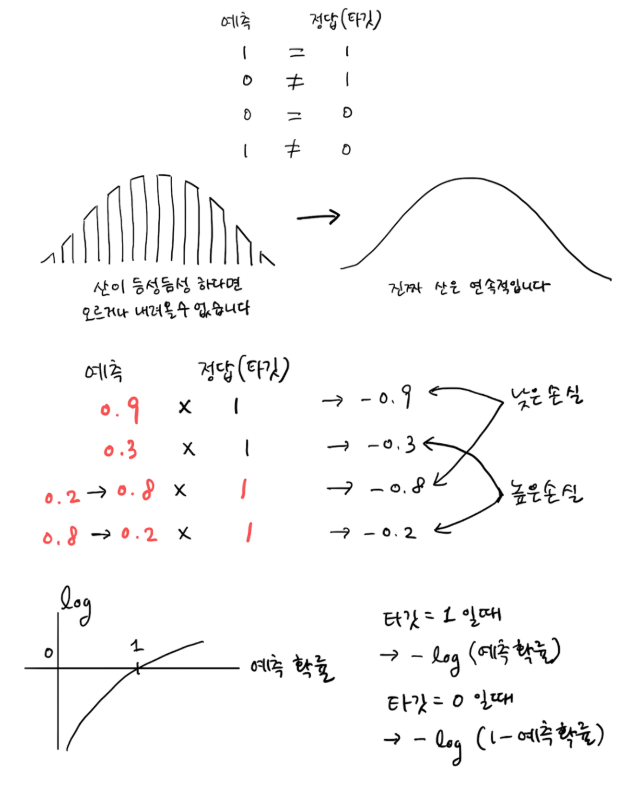

In [3]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()  # fish에 있는 리스트 위에 5개 출력

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
# Species(어종)을 제외한 나머지 필드를 fish_input 변수에 리스트 넣음
fish_target = fish['Species'].to_numpy() # Species(어종) 정답파일로 생성
print(fish_target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [5]:
from sklearn.model_selection import train_test_split

import numpy as np

np.set_printoptions(precision=6, suppress=True)

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)
print('train_input')
print(train_input)

train_input
[[ 720.       35.       40.6      16.3618    6.09  ]
 [ 500.       45.       48.        6.96      4.896 ]
 [   7.5      10.5      11.6       1.972     1.16  ]
 [ 110.       22.       23.5       5.5225    3.995 ]
 [ 140.       20.7      23.2       8.5376    3.2944]
 [  69.       18.2      20.3       5.2983    2.8217]
 [ 110.       21.       22.5       5.6925    3.555 ]
 [ 620.       34.5      39.7      15.5227    5.2801]
 [ 130.       21.3      22.8       6.384     3.534 ]
 [  85.       20.       21.        5.082     2.772 ]
 [ 685.       36.5      39.       10.881     6.864 ]
 [ 500.       31.       36.2      14.3714    4.8146]
 [ 514.       32.8      34.       10.03      6.018 ]
 [ 200.       23.       25.8      10.3458    3.6636]
 [1000.       44.       46.6      12.4888    7.5958]
 [ 714.       36.       41.5      16.517     5.8515]
 [   8.7      11.3      12.6       1.9782    1.2852]
 [1000.       43.       45.2      11.9328    7.2772]
 [ 110.       20.8      23.1      

In [6]:
print(train_input.shape)

(119, 5)


In [7]:
print(test_input.shape)

(40, 5)


In [8]:
print(train_target)

['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki' 'Roach' 'Perch' 'Bream' 'Perch'
 'Perch' 'Perch' 'Bream' 'Perch' 'Parkki' 'Perch' 'Bream' 'Smelt' 'Perch'
 'Roach' 'Bream' 'Pike' 'Bream' 'Pike' 'Perch' 'Parkki' 'Bream' 'Perch'
 'Pike' 'Bream' 'Perch' 'Parkki' 'Roach' 'Perch' 'Bream' 'Roach' 'Perch'
 'Bream' 'Bream' 'Perch' 'Perch' 'Roach' 'Pike' 'Perch' 'Smelt' 'Pike'
 'Roach' 'Perch' 'Parkki' 'Perch' 'Bream' 'Perch' 'Smelt' 'Perch' 'Parkki'
 'Smelt' 'Perch' 'Perch' 'Roach' 'Bream' 'Perch' 'Perch' 'Roach' 'Roach'
 'Perch' 'Perch' 'Bream' 'Roach' 'Bream' 'Roach' 'Parkki' 'Perch' 'Perch'
 'Perch' 'Perch' 'Pike' 'Pike' 'Perch' 'Bream' 'Perch' 'Bream' 'Whitefish'
 'Pike' 'Bream' 'Bream' 'Roach' 'Perch' 'Pike' 'Bream' 'Pike' 'Parkki'
 'Roach' 'Perch' 'Roach' 'Smelt' 'Whitefish' 'Roach' 'Perch' 'Bream'
 'Whitefish' 'Smelt' 'Pike' 'Roach' 'Smelt' 'Bream' 'Roach' 'Pike' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Smelt' 'Bream' 'Parkki' 'Perch'
 'Bream' 'Perch' 'Perch']


In [9]:
print(test_target)

['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch' 'Bream' 'Smelt' 'Roach'
 'Perch' 'Pike' 'Bream' 'Whitefish' 'Bream' 'Parkki' 'Bream' 'Bream'
 'Perch' 'Perch' 'Perch' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream'
 'Perch' 'Perch' 'Whitefish' 'Smelt' 'Smelt' 'Pike' 'Perch' 'Perch' 'Pike'
 'Bream' 'Perch' 'Roach' 'Roach' 'Parkki' 'Perch']


In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(f'train_scaled : {train_scaled[:5]}')

train_scaled : [[ 0.919658  0.609432  0.810412  1.851949  1.000757]
 [ 0.300412  1.546534  1.453166 -0.469817  0.272917]
 [-1.085854 -1.68647  -1.708486 -1.701598 -2.004476]
 [-0.797341 -0.608802 -0.674869 -0.824806 -0.276315]
 [-0.712899 -0.730625 -0.700927 -0.08023  -0.703387]]


In [18]:
print(test_scaled[:5])

[[-0.887414 -0.918046 -1.030989 -0.904645 -0.807625]
 [-1.069247 -1.50842  -1.543455 -1.588496 -1.938032]
 [-0.544014  0.356414  0.306633 -0.81357  -0.653889]
 [-0.346981 -0.233961 -0.223205 -0.11905  -0.122335]
 [-0.684751 -0.515091 -0.588011 -0.899878 -0.50125 ]]


In [24]:
from sklearn.linear_model import SGDClassifier
# SGDClassifier : 사이킷런의 확률적 경사 하강법 제공, 2개의 매개변수를 지정
# loss='log_loss' : 로지스틱 손실 함수 지정
# max_iter=10 : 10회 에포크 반복 (전체 훈련세트를 10회 반복)
sc = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target)) # 77.31 %
print(sc.score(test_scaled, test_target))   # 77.5 %  -> 반복횟수 부족으로 max_iter를 향상후 훈련
# 100번 이상일 경우 훈련 데이터 87% 테스트 데이터 80%

0.8739495798319328
0.8


In [ ]:
# 에포크와 과대/ 과소 적합
# 확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소, 과대 적합이 될 수 있음
# 에포크 횟수가 적으면 훈련세트를 덜 학습한다(119개인데 10번만 랜덤으로 추출 후 정지)
# 에포크 횟수가 충분히 많으면 훈련 세트를 완전히 학습할 것

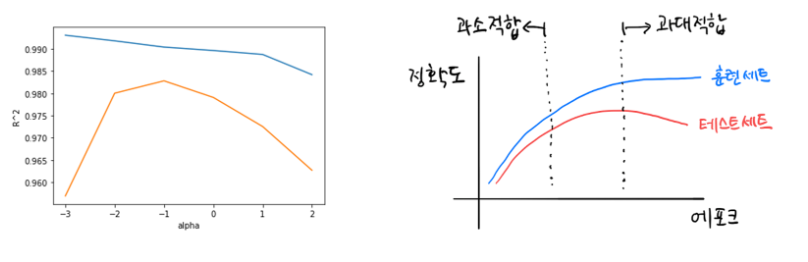

In [25]:
# 바꾸어 말하면 적은 에포크 횟수 동안에 훈련도니 모델은 훈련세트와 테스트 세트에 맞지 않음(과소적합)
# 반대로 에포크 횟수가 많은 훈련 모델인 경우 너무 잘맞아 테스트 세트에는 오히려 점수가 나쁨(과대적합)
# 과대적합이 되기전에 훈련을 멈추는것을 조기 종료라 함 tol-None

In [37]:

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []  # 훈련세트 점수를 누적하는 빈 리스트
test_score = [] # 테스트 세트 점수를 누적하는 빈 리스트
# train_target에 있는 7개의 생선목록을 제공
classes = np.unique(train_target)

for _ in range(0,80): # 300번의 에포크 동안 훈련 진행
  sc.partial_fit(train_scaled, train_target, classes = classes)
    # 훈련을 부분적으로 추가하는 partial_fit
    # 반복마다 훈련세트와 테스트 세트의 점수를 계산 하여 train_score와 test_score 리스트에 추가함
  train_score.append(sc.score(train_scaled, train_target))    # 훈련세트점수를 빈 리스트에 추가
  test_score.append(sc.score(test_scaled, test_target))       # 테스트세트점수를 빈 리스트에 추가



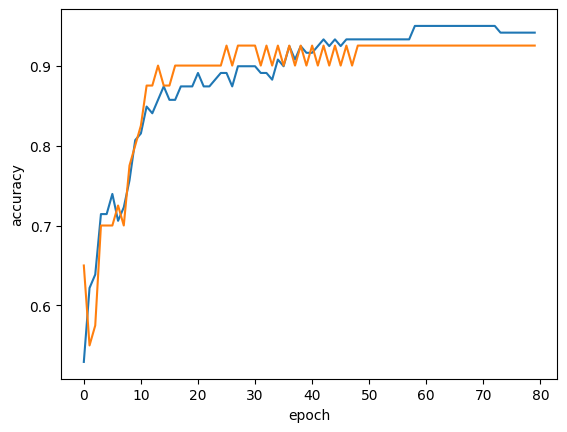

In [38]:
import matplotlib.pyplot as plt
plt.plot(train_score)   # 훈련세트 점수
plt.plot(test_score)    # 테스트세트 점수
plt.xlabel('epoch')     # 에포크 횟수
plt.ylabel('accuracy')  # 정확도
plt.show()

In [49]:
# 결론 에포크 횟수를 100번 정도 돌리니 차트상 과대, 과소 적합이 아님
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42) # tol=None 조기종료 안함
# 확률적 경사 하강법은 일정 에포크 동안 성능이 향상되지 않으면 더이상 훈련하지 않고 자동으로 멈춤

sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target)) # 95.79%
print(sc.score(test_scaled, test_target))   # 92.5 %로 최적의 상태로 분석됨

0.957983193277311
0.925


In [51]:
sc.predict(test_scaled[:5])  # Perch Smelt Pike Perch Perch

proba = sc.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)
# Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']
# array([[0.   , 0.003, 0.774, 0.   , 0.219, 0.   , 0.005],
#        [0.   , 0.001, 0.015, 0.   , 0.04 , 0.945, 0.   ],
#        [0.   , 0.   , 0.011, 0.96 , 0.02 , 0.008, 0.001],
#        [0.   , 0.   , 0.525, 0.   , 0.423, 0.   , 0.052],
#        [0.   , 0.   , 0.688, 0.   , 0.306, 0.   , 0.006]])

array([[0.   , 0.003, 0.774, 0.   , 0.219, 0.   , 0.005],
       [0.   , 0.001, 0.015, 0.   , 0.04 , 0.945, 0.   ],
       [0.   , 0.   , 0.011, 0.96 , 0.02 , 0.008, 0.001],
       [0.   , 0.   , 0.525, 0.   , 0.423, 0.   , 0.052],
       [0.   , 0.   , 0.688, 0.   , 0.306, 0.   , 0.006]])

In [53]:
sc.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='<U9')

In [54]:
# 손실함수에 대한 loss 매개변수
# loss 매개값의 기본값은 loss=hinge (힌지 손실) -> 서포트 백터 머신이라고 불림
# 또 다른 머신러닝 알고리즘을 위한 손실 함수이다. https://wikidocs.net/180482

sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
